In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [165]:
data=pd.read_csv('concrete_data.csv')

In [166]:
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [167]:
data.shape

(1030, 9)

In [168]:
data.dtypes

Cement                float64
Blast Furnace Slag    float64
Fly Ash               float64
Water                 float64
Superplasticizer      float64
Coarse Aggregate      float64
Fine Aggregate        float64
Age                     int64
Strength              float64
dtype: object

In [169]:
data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [170]:
X=data.loc[:, data.columns != 'Strength']

In [171]:
y=data['Strength']

In [172]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [175]:
from sklearn.linear_model import LinearRegression

In [176]:
linear_regression = LinearRegression()

In [177]:
linear_regression.fit(X_train,y_train)

LinearRegression()

In [178]:
y_pred=linear_regression.predict(X_test)

In [179]:
from sklearn.metrics import mean_absolute_error

In [180]:
mean_absolute_error(y_test, y_pred)

8.382613700933874

In [181]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca=pca.fit_transform(X)

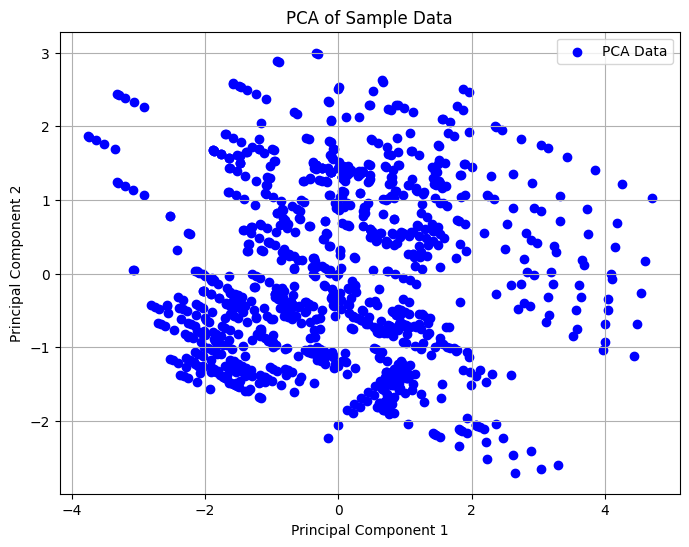

In [182]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='blue', label='PCA Data')
plt.title('PCA of Sample Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [183]:
from sklearn.svm import SVR

In [184]:
svr=SVR(kernel='rbf', C=1.0, epsilon=0.2)
svr.fit(X_train, y_train)

SVR(epsilon=0.2)

In [185]:
y_pred=svr.predict(X_test)

In [186]:
mean_absolute_error(y_test, y_pred)

8.36861244975889

In [187]:
from sklearn.ensemble import RandomForestRegressor

In [188]:
regr = RandomForestRegressor(max_depth=4, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, random_state=0)

In [189]:
y_pred=regr.predict(X_test)

In [190]:
mean_absolute_error(y_test, y_pred)

6.682209112122712

In [191]:
import tensorflow as tf
from tensorflow import keras

In [192]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(8,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

In [193]:
model.compile(optimizer='adam', loss='mean_absolute_error')

In [194]:
history = model.fit(X_train, y_train, epochs=300, batch_size=16, validation_split=0.2)

Epoch 1/300
35/35 [==============================] - 1s 7ms/step - loss: 35.4645 - val_loss: 35.1282
Epoch 2/300
35/35 [==============================] - 0s 3ms/step - loss: 33.0521 - val_loss: 32.0284
Epoch 3/300
35/35 [==============================] - 0s 3ms/step - loss: 28.6432 - val_loss: 25.9411
Epoch 4/300
35/35 [==============================] - 0s 3ms/step - loss: 20.7352 - val_loss: 16.3559
Epoch 5/300
35/35 [==============================] - 0s 3ms/step - loss: 13.5884 - val_loss: 11.7912
Epoch 6/300
35/35 [==============================] - 0s 3ms/step - loss: 11.9033 - val_loss: 11.0914
Epoch 7/300
35/35 [==============================] - 0s 3ms/step - loss: 11.3131 - val_loss: 10.8922
Epoch 8/300
35/35 [==============================] - 0s 3ms/step - loss: 11.0041 - val_loss: 10.7333
Epoch 9/300
35/35 [==============================] - 0s 3ms/step - loss: 10.7263 - val_loss: 10.5117
Epoch 10/300
35/35 [==============================] - 0s 3ms/step - loss: 10.4890 - val_los

In [195]:
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

11/11 [==============================] - 0s 2ms/step - loss: 4.3826
Test Loss: 4.382570266723633


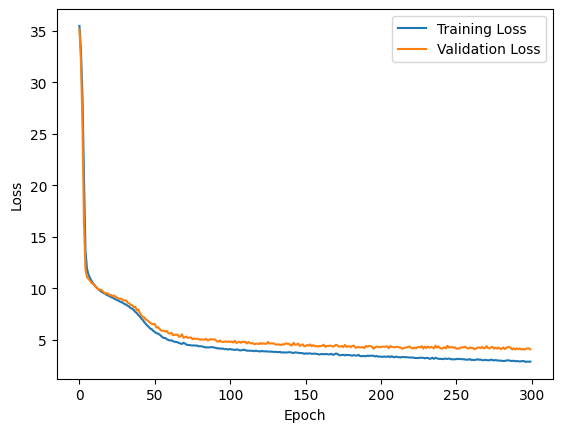

In [196]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()